This is what I got from ChatGPT.  I had to add the package. To add the package I had to remove the (presumably old) plots package and resinstall it.  I know there are lots of other ways to fix this sort of thing.  The package adding etc. did not take very long. Precompiling the DE package took several minutes and gave a lot of "redefine" warnings.  

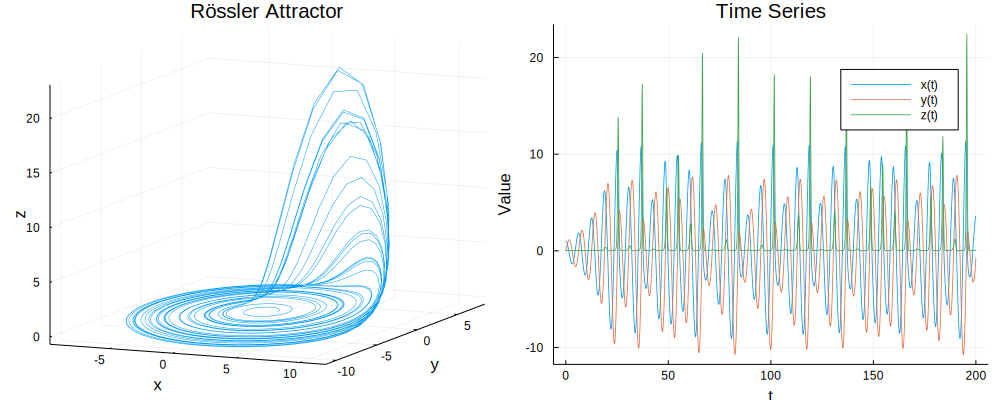


signal (15): Terminated: 15
in expression starting at /Users/allanstruthers/.julia/packages/IJulia/e8kqU/src/kernel.jl:53
kevent at /usr/lib/system/libsystem_kernel.dylib (unknown line)
uv__io_poll at /tmp/srccache/libuv-ed3700c849289ed01fe04273a7bf865340b2bd7e/src/unix/kqueue.c:161
uv_run at /tmp/srccache/libuv-ed3700c849289ed01fe04273a7bf865340b2bd7e/src/unix/core.c:360


In [8]:
using DifferentialEquations
using Plots

# Define the Rössler system
function rossler!(du, u, p, t)
    a, b, c = p
    x, y, z = u
    du[1] = -y - z
    du[2] = x + a*y
    du[3] = b + z*(x - c)
end

# Parameters and initial condition
a, b, c = 0.2, 0.2, 5.7
u0 = [1.0, 0.0, 0.0]
tspan = (0.0, 200.0)
p = (a, b, c)

# Solve the system
prob = ODEProblem(rossler!, u0, tspan, p)
sol = solve(prob, Tsit5(); dt=0.01, saveat=0.1)
# refine the solution to get a smoother pic
# sol = solve(prob, Tsit5(); dt=0.01, saveat=0.01)

# Extract time and solution
t = sol.t
x = sol[1, :]
y = sol[2, :]
z = sol[3, :]

# Plot 3D phase portrait
plt1 = plot(x, y, z, lw=0.5, legend=false,
            xlabel="x", ylabel="y", zlabel="z",
            title="Rössler Attractor")

# Plot time series of x, y, z
plt2 = plot(t, x, lw=0.8, label="x(t)", xlabel="t", ylabel="Value", title="Time Series")
plot!(t, y, lw=0.8, label="y(t)")
plot!(t, z, lw=0.8, label="z(t)")

# Combine in a layout
plot(plt1, plt2, layout=(1,2), size=(1000,400))
